In [ ]:
!pip install pandas numpy scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Step 3: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [ ]:
# Step 4: Load the dataset
df = pd.read_csv('/content/drive/My Drive/Project4/df_final.csv')
df.head()

,Age,Amount_invested_monthly,Annual_Income,Changed_Credit_Limit,Credit_History_Age,Credit_Mix,Credit_Utilization_Ratio,Delay_from_due_date,Interest_Rate,Monthly_Balance,...,Outstanding_Debt,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount,Total_EMI_per_month,Credit_Score
0,-0.534333,-0.819572,-0.168657,-0.677818,0.935188,-0.310206,0.233856,-1.205012,-0.141846,0.661388,...,-0.729432,2.718226,-0.487972,-0.372983,-0.344798,-0.369556,-0.599928,-1.027412,-0.796429,2
1,1.841583,-0.604667,-0.329110,-1.290715,-0.273985,-0.310206,-1.100680,-1.440253,-0.145969,0.426887,...,-0.697511,-0.367887,-0.487972,-0.372983,2.900247,-0.369556,-0.599928,-1.027412,-0.828238,2
2,1.841583,-0.191631,-0.329110,-1.290715,-0.263378,-0.310206,0.644367,-1.048185,-0.145969,0.258099,...,-0.697511,-0.367887,-0.487972,-0.372983,-0.344798,-0.369556,1.666868,-1.027412,-0.828238,2
3,1.932965,1.203534,-0.329110,-1.287142,-0.242164,-0.310206,1.214153,-0.891358,-0.145969,-0.794120,...,-0.697511,-0.367887,-0.487972,-0.372983,-0.344798,-0.369556,1.666868,-1.027412,-0.828238,2
4,1.932965,-0.569431,-0.329110,-1.108454,-0.220951,-0.310206,-0.920659,-1.048185,-0.145969,0.328952,...,-0.697511,-0.367887,-0.487972,2.681087,-0.344798,-0.369556,-0.599928,-1.027412,-0.828238,2


In [ ]:
# Step 5: Define the target column
target_column = 'Credit_Score'

In [ ]:
# Step 6: Split the data into features (X) and target (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

In [ ]:
# Step 7: Handle categorical variables if there are any
X = pd.get_dummies(X)

In [ ]:
# Step 8: Split the data: 70% training, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [ ]:
# Step 9: Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
# Step 11: Impute missing values in training, validation, and test sets
imputer = SimpleImputer(strategy='mean')


In [ ]:
# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

In [ ]:
# Transform the validation and test data
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Step 10: Train the model on the imputed training set
rf_model.fit(X_train_imputed, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
# Step 12: Validate the model on the validation set
y_val_pred = rf_model.predict(X_val_imputed)
print("Validation Set Results:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Set Results:
Accuracy: 0.9127628361858191
Confusion Matrix:
 [[3591    1   39]
 [  31 3599   93]
 [ 379  349 2143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      3631
           1       0.91      0.97      0.94      3723
           2       0.94      0.75      0.83      2871

    accuracy                           0.91     10225
   macro avg       0.92      0.90      0.90     10225
weighted avg       0.92      0.91      0.91     10225



In [ ]:
# Step 13: Test the model on the test set
y_test_pred = rf_model.predict(X_test_imputed)
print("Test Set Results:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Test Set Results:
Accuracy: 0.915802855466458
Confusion Matrix:
 [[3550    2   39]
 [  32 3622   79]
 [ 331  378 2193]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      3591
           1       0.91      0.97      0.94      3733
           2       0.95      0.76      0.84      2902

    accuracy                           0.92     10226
   macro avg       0.92      0.90      0.91     10226
weighted avg       0.92      0.92      0.91     10226



In [28]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.10396989583650385, 'Outstanding_Debt'),
 (0.08630707576092052, 'Credit_Mix'),
 (0.08283523360914521, 'Interest_Rate'),
 (0.058552630634541115, 'Credit_History_Age'),
 (0.057182654152477204, 'Delay_from_due_date'),
 (0.052754800902668694, 'Changed_Credit_Limit'),
 (0.04823816321162128, 'Num_Credit_Card'),
 (0.04486689062292797, 'Amount_invested_monthly'),
 (0.04470587347522469, 'Credit_Utilization_Ratio'),
 (0.043771114606017916, 'Num_Credit_Inquiries'),
 (0.043696946368350774, 'Num_of_Delayed_Payment'),
 (0.043677962144324886, 'Monthly_Balance'),
 (0.04038350745994146, 'Monthly_Inhand_Salary'),
 (0.04036355193525679, 'Annual_Income'),
 (0.04001735049326707, 'Total_EMI_per_month'),
 (0.03952614483322521, 'Payment_of_Min_Amount'),
 (0.03877384575528297, 'Age'),
 (0.0357252209714595, 'Num_Bank_Accounts'),
 (0.024943406265960543, 'Num_of_Loan'),
 (0.00609956512754917, 'Payment_Behaviour_Low_spent_Small_value_payments'),
 (0.00553495963633884, 'Payment_Behaviour_High_spent_Medium_value_

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

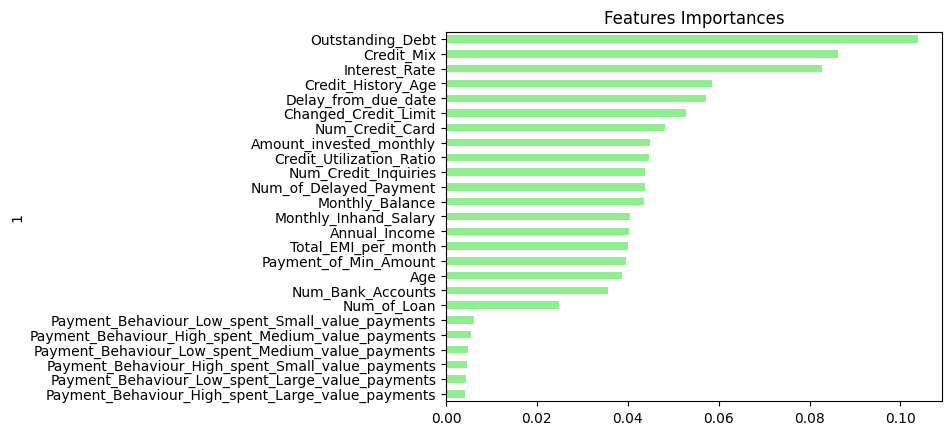

In [29]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

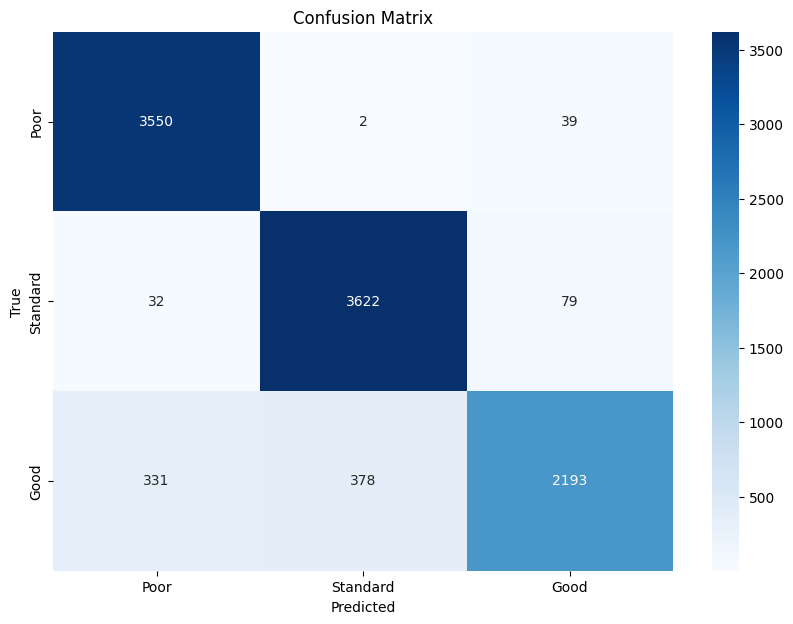

In [ ]:
# Confusion Matrix Plot
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Balancing the Dataset**

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_imputed, y_train)

rf_model.fit(X_resampled, y_resampled)


RandomForestClassifier(class_weight={0: 1, 1: 1, 2: 3}, n_estimators=1000,
                       random_state=42)

In [30]:
# Initialize the Random Forest model with class weights
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42, class_weight={0: 1, 1: 1, 2: 3})

# Train the model on the resampled dataset
rf_model.fit(X_resampled, y_resampled)

# Validate the model on the validation set
y_val_pred = rf_model.predict(X_val_imputed)
print("Validation Set Results:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Test the model on the test set
y_test_pred = rf_model.predict(X_test_imputed)
print("Test Set Results:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Set Results:
Accuracy: 0.9126650366748166
Confusion Matrix:
 [[3589    1   41]
 [  27 3600   96]
 [ 382  346 2143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      3631
           1       0.91      0.97      0.94      3723
           2       0.94      0.75      0.83      2871

    accuracy                           0.91     10225
   macro avg       0.92      0.90      0.90     10225
weighted avg       0.91      0.91      0.91     10225

Test Set Results:
Accuracy: 0.916487385096812
Confusion Matrix:
 [[3548    2   41]
 [  34 3623   76]
 [ 331  370 2201]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      3591
           1       0.91      0.97      0.94      3733
           2       0.95      0.76      0.84      2902

    accuracy                           0.92     10226
   macro avg       0.92      0.91      0.91     1022

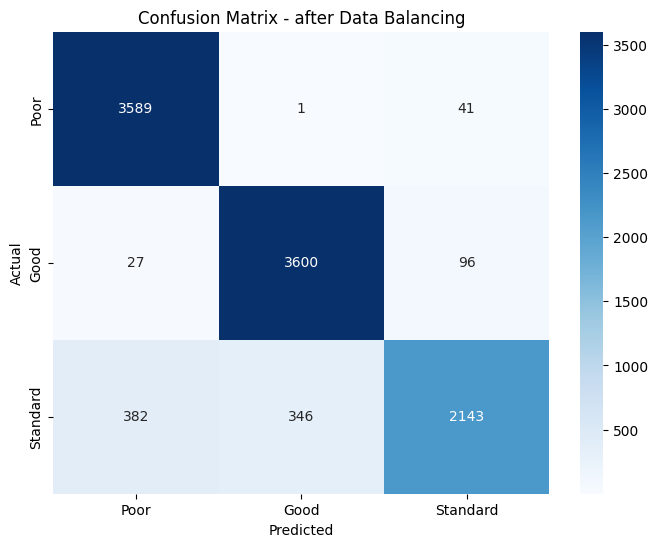

In [35]:
# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Good', 'Standard'], yticklabels=['Poor', 'Good', 'Standard'])
plt.title('Confusion Matrix - after Data Balancing')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()